<a href="https://colab.research.google.com/github/Lnguyen19/CS_478/blob/main/Eric_Thompson_Lam_Nguyen_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lam Nguyen and Eric Thompson
# HW3, CNN
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD
from tensorflow import keras
import tensorflow as tf

import numpy as np

from matplotlib import pyplot as plt
import pandas as pd

import random

In [ ]:
# Loading Data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
labels = np.loadtxt("cifar100labels.txt", delimiter=',', dtype=str)

In [ ]:
# Set hyperparameters
epochs = 25
batch_size = 128
max_pooling_size = 2
padding = 'same'
optimizer = 'nadam' # Changed from adam to nadam
n_classes = 100

In [ ]:
# Load and Split data

# Cifar100: 32x32x3
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
from keras.layers.core.embedding import Embedding
#step 3
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # Changed from 64 to 128
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(256, activation='relu')) # Newly added
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
# Configure and train model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_split=0.2)

Epoch 1/25
313/313 [==============================] - 4s 9ms/step - loss: 4.3275 - accuracy: 0.0416 - val_loss: 3.8976 - val_accuracy: 0.1086
Epoch 2/25
313/313 [==============================] - 2s 8ms/step - loss: 3.8733 - accuracy: 0.0975 - val_loss: 3.6049 - val_accuracy: 0.1590
Epoch 3/25
313/313 [==============================] - 2s 8ms/step - loss: 3.6244 - accuracy: 0.1416 - val_loss: 3.3649 - val_accuracy: 0.2021
Epoch 4/25
313/313 [==============================] - 2s 8ms/step - loss: 3.4699 - accuracy: 0.1661 - val_loss: 3.2709 - val_accuracy: 0.2138
Epoch 5/25
313/313 [==============================] - 3s 9ms/step - loss: 3.3368 - accuracy: 0.1927 - val_loss: 3.1963 - val_accuracy: 0.2297
Epoch 6/25
313/313 [==============================] - 4s 12ms/step - loss: 3.2375 - accuracy: 0.2106 - val_loss: 3.0332 - val_accuracy: 0.2598
Epoch 7/25
313/313 [==============================] - 3s 11ms/step - loss: 3.1551 - accuracy: 0.2244 - val_loss: 3.1113 - val_accuracy: 0.2401
Epoc

In [ ]:
model.summary()
model.save('model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# uncomment to load model if we have it saved
# model = keras.models.load_model('model.h5')

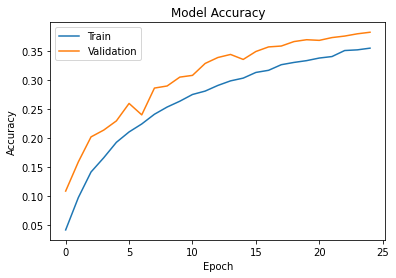

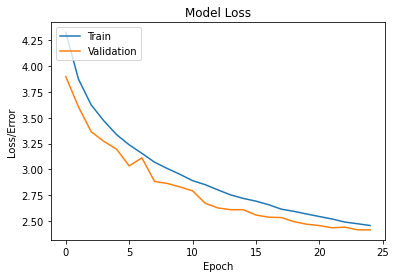

In [ ]:
# 5a, accuracy summary

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

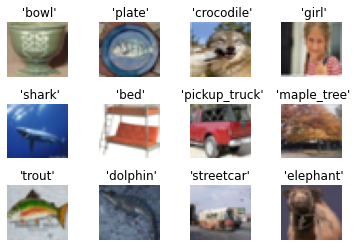

In [ ]:
# 5b random subsample
randomImages = random.choices(x_test, k=12)

# Read in labels from text file, split them up into list
textfile = open("cifar100labels.txt", "r")
labels = textfile.read().split(',')

# Generate our predictions
predictions = []
for image in randomImages:
  image = image.reshape(1, 32, 32, 3) # Reshape each image
  # Generate prediction class number
  predict = model.predict(image, verbose=0)
  class_predict = np.argmax(predict, axis=-1)
  # Append to list of predictions
  predictions.append(class_predict)

# Display our random images with labels
imagePlot = plt.figure()
imageNumber = 1

for image in randomImages:
  plt.subplot(3, 4, imageNumber)
  imageNumber+=1
  # Display the label above the image
  number = int(str(predictions[imageNumber-2]).strip('[]'))
  plt.title(labels[number])
  plt.axis('off')
  plt.imshow(image, aspect='auto')

# Adjust spacing of images
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [ ]:
# 6 Tuning model
#
# Original validation accuracy: ~30%
#
# Changes:
# Added a new dense layer (undid this, it worsened validation accuracy)
# Added dropouts
# Changed a conv layer from 64 to 128 neurons
# Changed optimizer from 'adam' to 'nadam'
#
# New validation accuracy: ~40%
#
# More epochs would likely help since the training/validation curves haven't flattened out yet, but it would take a while to compile